In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = (11,7)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 10

In [3]:
df = pd.read_csv("spotify-2023.csv" , encoding = 'latin-1')

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
for r, v in enumerate(df['streams']):
    try:
        int(v)
    except:
        print('Incorrect value')
        print(f'row: {r}')
        print(f'value: {v}')

Incorrect value
row: 574
value: BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3


In [7]:
df = df.drop(574)

In [8]:
df['streams'] = df['streams'].astype('int64')

In [9]:
df['streams'].describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

In [10]:
pd.unique(df['mode'])

array(['Major', 'Minor'], dtype=object)

In [11]:
df['mode'].replace(['Major', 'Minor'],[0, 1], inplace=True)
df['mode'] = df['mode'].astype('int64')

C:\Users\varun\AppData\Local\Temp\ipykernel_14924\3647312973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mode'].replace(['Major', 'Minor'],[0, 1], inplace=True)
C:\Users\varun\AppData\Local\Temp\ipykernel_14924\3647312973.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mode'].rep

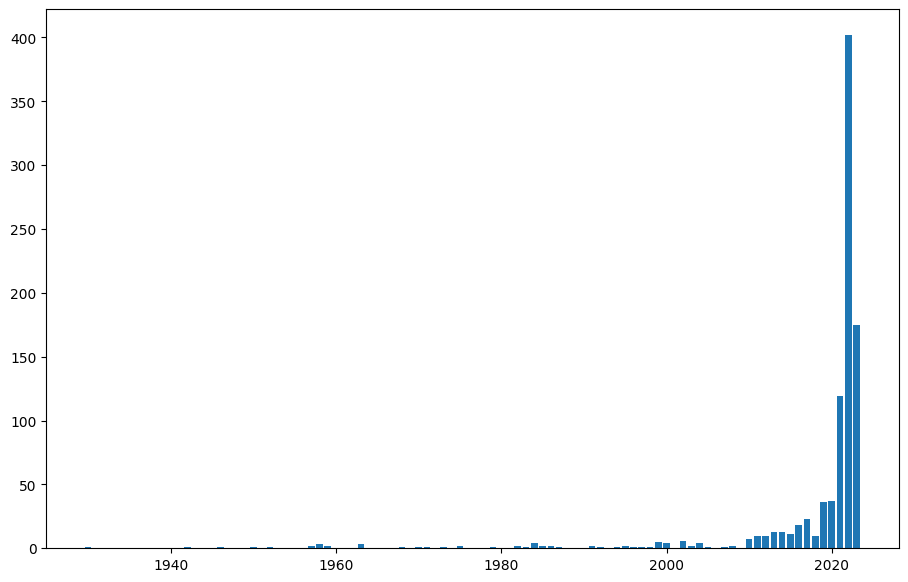

In [12]:
xbar = df['released_year'].value_counts().index
ybar = df['released_year'].value_counts().values
plt.bar(xbar,ybar)
plt.show()

In [13]:
df['released_year'].min()

1930

In [14]:
df['released_year'].max()

2023

In [15]:
columns = ['streams','released_year','bpm','mode','danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [16]:
df_copy = df[columns].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   streams             952 non-null    int64
 1   released_year       952 non-null    int64
 2   bpm                 952 non-null    int64
 3   mode                952 non-null    int64
 4   danceability_%      952 non-null    int64
 5   valence_%           952 non-null    int64
 6   energy_%            952 non-null    int64
 7   acousticness_%      952 non-null    int64
 8   instrumentalness_%  952 non-null    int64
 9   liveness_%          952 non-null    int64
 10  speechiness_%       952 non-null    int64
dtypes: int64(11)
memory usage: 89.2 KB


In [17]:
stand_scaler= StandardScaler()
df_copy[columns] = stand_scaler.fit_transform(df_copy[columns])

In [18]:
df_copy.describe()

,streams,released_year,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02,9.520000e+02
mean,-4.478211e-17,7.612958e-15,-7.463684e-17,-4.478211e-17,2.724245e-16,-2.612289e-17,-1.865921e-17,8.210053e-17,6.157539e-17,-7.090500e-17,5.970947e-17
std,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00,1.000526e+00
min,-9.074686e-01,-8.022168e+00,-2.051466e+00,-8.567741e-01,-3.007759e+00,-2.020033e+00,-3.339865e+00,-1.041975e+00,-1.882343e-01,-1.109627e+00,-8.212411e-01
25%,-6.574799e-01,1.554784e-01,-8.128209e-01,-8.567741e-01,-6.827489e-01,-8.269284e-01,-6.812256e-01,-8.110986e-01,-1.882343e-01,-5.990946e-01,-6.194286e-01
50%,-3.946746e-01,3.372038e-01,-5.537621e-02,-8.567741e-01,1.378427e-01,-1.732186e-02,1.042815e-01,-3.493460e-01,-1.882343e-01,-4.532281e-01,-4.176162e-01
75%,2.819328e-01,3.372038e-01,6.307796e-01,1.167169e+00,7.532865e-01,7.922847e-01,7.689414e-01,6.126387e-01,-1.882343e-01,4.219710e-01,8.691504e-02
max,5.630052e+00,4.280666e-01,2.974402e+00,1.167169e+00,1.984174e+00,1.942778e+00,1.977414e+00,2.690526e+00,1.063268e+01,5.746098e+00,5.434946e+00


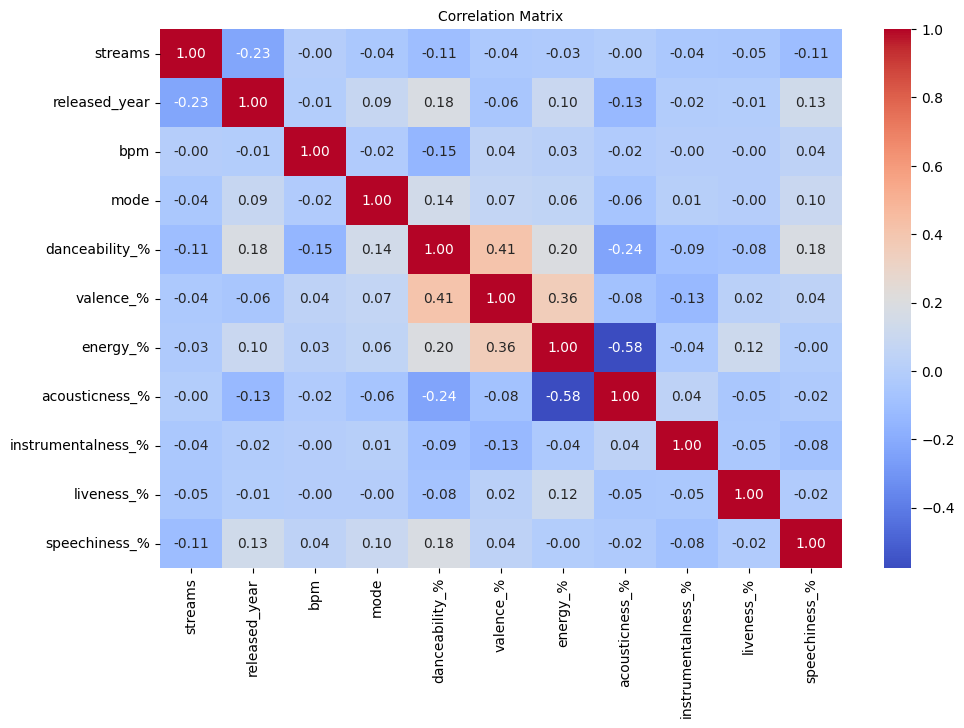

In [19]:
correlation_matrix = df_copy.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

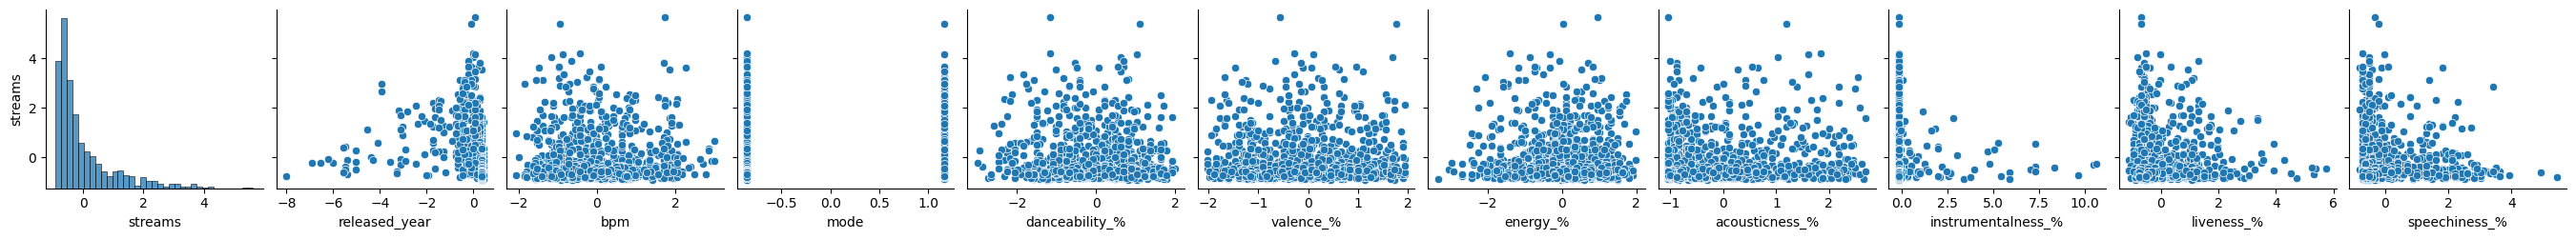

In [20]:
sns.pairplot(df_copy, x_vars = columns, y_vars = ['streams'])

In [21]:
df.describe

<bound method NDFrame.describe of                               track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_

In [22]:
# Assuming df is your DataFrame
column_names = df.columns.tolist()
print(column_names)


['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
